In [48]:

import streamlit as st
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import subprocess
import os
from PIL import Image
import torch
import sys

#detection
!python segment/predict.py --source "combistrail-ed.jpg" --img 640 --device "cpu" --weights "models/segment/best-2.pt" --name "yolov9_c_640_detect" \
     --exist-ok --save-txt 

segment/predict: weights=['models/segment/best-2.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 0059827 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-c-seg summary: 414 layers, 27363670 parameters, 0 gradients, 144.2 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 1 rails, 2 violations, 494.9ms
Speed: 2.1ms pre-process, 494.9ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/yolov9_c_640_detect
2 labels saved to runs/predict-seg/yolov9_c_640_detect/labels


In [49]:
def extract_class_0_coordinates(filename):
    class_0_coordinates = []
    current_class = None
    
    with open(filename, 'r') as file:
          
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:
                continue
            
            if parts[0] == '0':
                coordinates = [float(x) for x in parts[1:]]
                class_0_coordinates.extend(coordinates)
    
    return class_0_coordinates

coordinates = extract_class_0_coordinates('runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt')


In [50]:
coordinates

[0.595312,
 0.404359,
 0.59375,
 0.406584,
 0.59375,
 0.408808,
 0.590625,
 0.413256,
 0.590625,
 0.41548,
 0.589063,
 0.417705,
 0.589063,
 0.422153,
 0.5875,
 0.424377,
 0.5875,
 0.426601,
 0.576563,
 0.442171,
 0.576563,
 0.444395,
 0.575,
 0.446619,
 0.575,
 0.448843,
 0.573438,
 0.451068,
 0.573438,
 0.453292,
 0.570312,
 0.45774,
 0.570312,
 0.466637,
 0.56875,
 0.468861,
 0.56875,
 0.475534,
 0.567187,
 0.477758,
 0.567187,
 0.484431,
 0.565625,
 0.486655,
 0.565625,
 0.488879,
 0.564062,
 0.491103,
 0.564062,
 0.493327,
 0.5625,
 0.495552,
 0.5625,
 0.504448,
 0.560938,
 0.506673,
 0.560938,
 0.508897,
 0.559375,
 0.511121,
 0.559375,
 0.517794,
 0.557813,
 0.520018,
 0.557813,
 0.522242,
 0.55625,
 0.524466,
 0.55625,
 0.52669,
 0.554688,
 0.528915,
 0.554688,
 0.531139,
 0.553125,
 0.533363,
 0.553125,
 0.535587,
 0.551562,
 0.537811,
 0.551562,
 0.54226,
 0.55,
 0.544484,
 0.55,
 0.546708,
 0.548437,
 0.548932,
 0.548437,
 0.551157,
 0.545313,
 0.555605,
 0.545313,
 0.566726

In [51]:
!python detect.py --source 'combistrail-ed.jpg' --img 640 --device cpu --weights 'models/detect/yolov9-s-converted.pt' --name yolov9_c_640_detect \
--exist-ok --save-txt 

detect: weights=['models/detect/yolov9-s-converted.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 0059827 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-s summary: 489 layers, 7105888 parameters, 34224 gradients, 26.4 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 3 cars, 1 truck, 254.9ms
Speed: 2.2ms pre-process, 254.9ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov9_c_640_detect
2 labels saved to runs/detect/yolov9_c_640_detect/labels


segment/predict: weights=['models/segment/best-2.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 2024-8-2 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-c-seg summary: 414 layers, 27363670 parameters, 0 gradients, 144.2 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 1 rails, 2 violations, 587.2ms
Speed: 1.9ms pre-process, 587.2ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/yolov9_c_640_detect
1 labels saved to runs/predict-seg/yolov9_c_640_detect/labels
detect: weights=['models/d

Error parsing line: 1 0.75 0.30427 0.748438 0.306495 0.74375 0.306495 0.739062 0.313167 0.739062 0.315391 0.721875 0.339858 0.720312 0.339858 0.71875 0.342082 0.71875 0.344306 0.714063 0.350979 0.714063 0.373221 0.715625 0.375445 0.715625 0.377669 0.721875 0.377669 0.723437 0.375445 0.729688 0.375445 0.73125 0.377669 0.735937 0.377669 0.7375 0.379893 0.742188 0.379893 0.74375 0.382117 0.773438 0.382117 0.775 0.379893 0.782812 0.379893 0.784375 0.377669 0.790625 0.377669 0.792188 0.375445 0.79375 0.375445 0.796875 0.370996 0.796875 0.368772 0.798437 0.366548 0.798437 0.357651 0.8 0.355427 0.8 0.350979 0.798437 0.348754 0.798437 0.342082 0.795313 0.337633 0.795313 0.335409 0.79375 0.333185 0.79375 0.330961 0.790625 0.326512 0.790625 0.324288 0.789062 0.322064 0.789062 0.31984 0.7875 0.317616 0.7875 0.308719 0.785937 0.306495 0.782812 0.306495 0.78125 0.30427. Error: Invalid YOLO box format: Expected 4 values, got 99
Error parsing line: 1 0.645312 0.330961 0.64375 0.333185 0.639063 0.3331

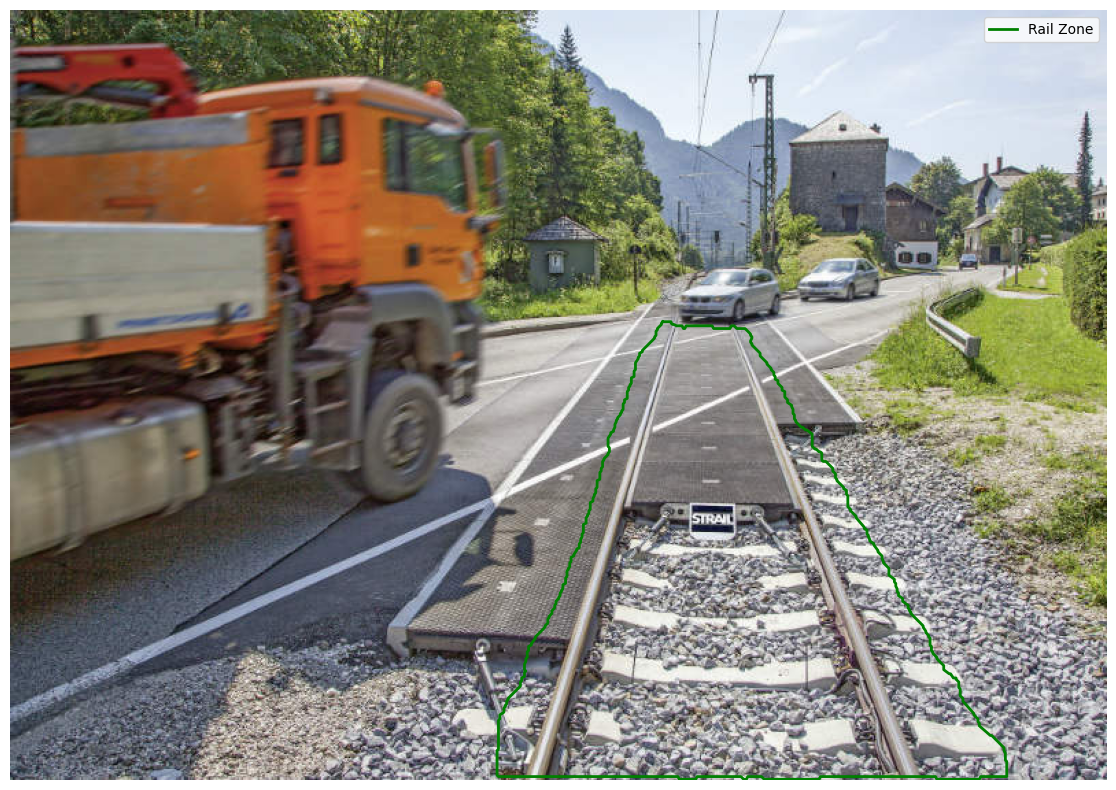

In [54]:
import numpy as np
from shapely.geometry import Point, Polygon, box as shapely_box
import cv2
import matplotlib.pyplot as plt
import os

def detection_YOLO(img):
    # Run YOLOv9 segmentation
    os.system(f"python segment/predict.py --source {img} --img 640 --device cpu --weights models/segment/best-2.pt --name yolov9_c_640_detect --exist-ok --save-txt")

    # Run YOLOv9 detection
    os.system(f"python detect.py --source {img} --img 640 --device cpu --weights models/detect/yolov9-s-converted.pt --name yolov9_c_640_detect --exist-ok --save-txt")
    
def extract_class_0_coordinates(filename):
    class_0_coordinates = []
    current_class = None
    
    with open(filename, 'r') as file:
          
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:
                continue
            
            if parts[0] == '0':
                coordinates = [float(x) for x in parts[1:]]
                class_0_coordinates.extend(coordinates)
    
    return class_0_coordinates



def parse_yolo_box(box_string):
    """Parse a YOLO format bounding box string."""
    try:
        class_id, x_center, y_center, width, height = map(float, box_string.split())
        return int(class_id), x_center, y_center, width, height
    except ValueError:
        raise ValueError("Invalid YOLO box format. Expected 5 space-separated values.")

def yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height):
    """Convert YOLO format coordinates to pixel coordinates."""
    x1 = int((x_center - width / 2) * img_width)
    y1 = int((y_center - height / 2) * img_height)
    x2 = int((x_center + width / 2) * img_width)
    y2 = int((y_center + height / 2) * img_height)
    return x1, y1, x2, y2

def yolo_to_pixel_coord(x, y, img_width, img_height):
    """Convert a single YOLO coordinate to pixel coordinate."""
    return int(x * img_width), int(y * img_height)

def convert_segment_to_pixel(segment, img_width, img_height):
    """Convert segment coordinates from YOLO format to pixel coordinates."""
    pixel_segment = []
    for i in range(0, len(segment), 2):
        x, y = yolo_to_pixel_coord(segment[i], segment[i+1], img_width, img_height)
        pixel_segment.extend([x, y])
    return pixel_segment

def box_segment_relationship(yolo_box, segment, img_width, img_height, threshold):
    """Check the relationship between a bounding box and a segmented area."""
    class_id, x_center, y_center, width, height = parse_yolo_box(yolo_box)
    x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
    
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    segment_polygon = Polygon(zip(pixel_segment[::2], pixel_segment[1::2]))
    
    box_polygon = shapely_box(x1, y1, x2, y2)
    
    if box_polygon.intersects(segment_polygon):
        return "intersecting"
    elif box_polygon.distance(segment_polygon) <= threshold:
        return "obstructed"
    else:
        return "not touching"

def plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold):
    """Plot the image with intersecting boxes, obstructed boxes, and segment."""
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Plot segment
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    plt.plot(pixel_segment[::2] + [pixel_segment[0]], pixel_segment[1::2] + [pixel_segment[1]], 'g-', linewidth=2, label='Rail Zone')
    
    # Plot boxes
    for yolo_box in yolo_boxes:
        class_id, x_center, y_center, width, height = parse_yolo_box(yolo_box)
        x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
        
        relationship = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
        
        if relationship == "intersecting":
            color = 'r'
            label = 'Intersecting Box'
        elif relationship == "obstructed":
            color = 'y'
            label = 'Obstructed Box'
        else:
            color = 'b'
            label = 'Non'
        
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2, label=label))
    
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def parse_yolo_box(box_string):
    """Parse a YOLO format bounding box string with 4 values."""
    try:
        values = list(map(float, box_string.split()))
        if len(values) != 4:
            raise ValueError(f"Expected 4 values, got {len(values)}")
        return values
    except ValueError as e:
        raise ValueError(f"Invalid YOLO box format: {str(e)}")

def read_yolo_boxes(file_path):
    """Read YOLO format bounding boxes from a file."""
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    yolo_boxes = []
    for line in lines:
        try:
            box = parse_yolo_box(line.strip())
            yolo_boxes.append(box)
        except ValueError as e:
            print(f"Error parsing line: {line.strip()}. Error: {str(e)}")
    
    return yolo_boxes

def main():
    # Read the image
    image_path = 'combistrail-ed.jpg'
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read the image at {image_path}")
        return

    img_height, img_width = image.shape[:2]
    detection_YOLO(image_path)

    coordinates = extract_class_0_coordinates('runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt')
    yolo_boxes= read_yolo_boxes('runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt')


    segment = coordinates # Example segment in YOLO format
    
    
    # Set threshold (in pixels)
    threshold = 10
    
    # Plot the image with boxes and segment
    plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold)
    
    # Print relationship results
    for yolo_box in yolo_boxes:
        try:
            result = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
            print(f"Box {yolo_box} is {result} the segment.")
        except ValueError as e:
            print(f"Error processing box {yolo_box}: {str(e)}")

if __name__ == "__main__":
    main()

In [11]:
result

False

In [23]:
pip install shapely


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


segment/predict: weights=['models/segment/best-2.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 2024-8-2 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-c-seg summary: 414 layers, 27363670 parameters, 0 gradients, 144.2 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 1 rails, 2 violations, 470.6ms
Speed: 2.2ms pre-process, 470.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/yolov9_c_640_detect
1 labels saved to runs/predict-seg/yolov9_c_640_detect/labels
detect: weights=['models/d

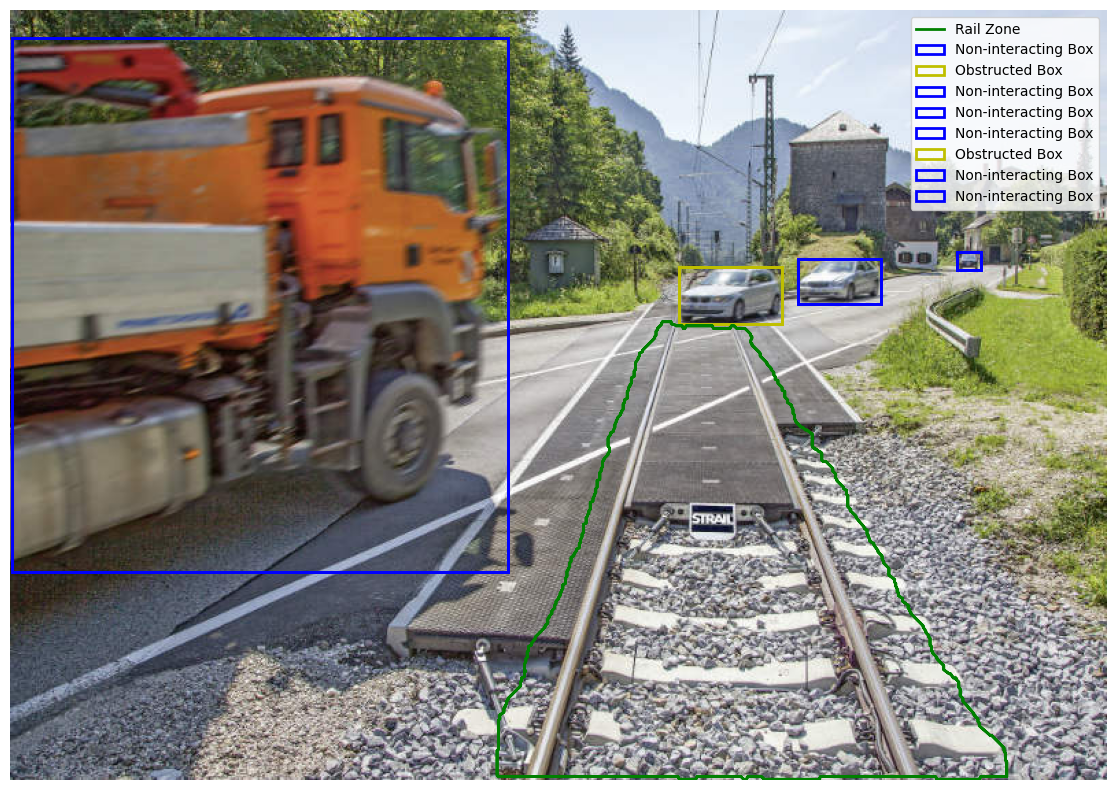

Box (2.0, 0.874375, 0.326512, 0.02125, 0.0231317) is not touching the segment.
Box (2.0, 0.656875, 0.370107, 0.09375, 0.0747331) is obstructed the segment.
Box (2.0, 0.75625, 0.351424, 0.075, 0.0587189) is not touching the segment.
Box (7.0, 0.228125, 0.383452, 0.45375, 0.692171) is not touching the segment.
Box (2.0, 0.874375, 0.326512, 0.02125, 0.0231317) is not touching the segment.
Box (2.0, 0.656875, 0.370107, 0.09375, 0.0747331) is obstructed the segment.
Box (2.0, 0.75625, 0.351424, 0.075, 0.0587189) is not touching the segment.
Box (7.0, 0.228125, 0.383452, 0.45375, 0.692171) is not touching the segment.
Successfully removed runs/detect/yolov9_c_640_detect/labels/combistrail-ed.txt
Successfully removed runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt


In [55]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box as shapely_box

# ... (previous functions remain unchanged)

def parse_yolo_box(box_string):
    """Parse a YOLO format bounding box string."""
    values = list(map(float, box_string.split()))
    if len(values) < 5:  # Changed from 4 to 5
        raise ValueError(f"Expected at least 5 values, got {len(values)}")
    return values[0], values[1], values[2], values[3], values[4]  # class_id, x_center, y_center, width, height

def read_yolo_boxes(file_path):
    """Read YOLO format bounding boxes from a file."""
    with open(file_path, 'r') as f:
        return [parse_yolo_box(line.strip()) for line in f if line.strip()]

def box_segment_relationship(yolo_box, segment, img_width, img_height, threshold):
    """Check the relationship between a bounding box and a segmented area."""
    class_id, x_center, y_center, width, height = yolo_box
    x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
    
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    
    segment_polygon = Polygon(zip(pixel_segment[::2], pixel_segment[1::2]))
    box_polygon = shapely_box(x1, y1, x2, y2)
    
    if box_polygon.intersects(segment_polygon):
        return "intersecting"
    elif box_polygon.distance(segment_polygon) <= threshold:
        return "obstructed"
    else:
        return "not touching"

def plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold):
    """Plot the image with intersecting boxes, obstructed boxes, and segment."""
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    plt.plot(pixel_segment[::2] + [pixel_segment[0]], pixel_segment[1::2] + [pixel_segment[1]], 'g-', linewidth=2, label='Rail Zone')
    
    colors = {'intersecting': 'r', 'obstructed': 'y', 'not touching': 'b'}
    labels = {'intersecting': 'Intersecting Box', 'obstructed': 'Obstructed Box', 'not touching': 'Non-interacting Box'}
    
    for yolo_box in yolo_boxes:
        class_id, x_center, y_center, width, height = yolo_box
        x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
        relationship = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
        
        color = colors[relationship]
        label = labels[relationship]
        
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2, label=label))
    
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    image_path = 'combistrail-ed.jpg'
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read the image at {image_path}")
        return

    img_height, img_width = image.shape[:2]
    run_yolo_models(image_path)

    label_path = 'runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt'
    label_path2 = 'runs/detect/yolov9_c_640_detect/labels/combistrail-ed.txt'
    segment = extract_class_0_coordinates(label_path)
    yolo_boxes = read_yolo_boxes(label_path2)

    threshold = 10  # Set threshold (in pixels)
    
    plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold)
    
    for yolo_box in yolo_boxes:
        result = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
        print(f"Box {yolo_box} is {result} the segment.")

    def remove_file(file_path):
        try:
            os.remove(file_path)
            print(f"Successfully removed {file_path}")
        except OSError as e:
            print(f"Error: {e.strerror}. Unable to remove {file_path}")

    remove_file(label_path2)
    remove_file(label_path)

if __name__ == "__main__":
    main()